In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Exploratory Data Analysis

In [105]:
df = pd.read_csv('insurance.csv')
df.columns = df.columns.str.strip()

In [50]:
df.shape

(1338, 7)

Note : 1338 rows and 7 columns

In [51]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Note : 2 integers / 2 floats / 3 string type

To do : Encode the strings if Needed

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Note : 

Data present are between 18 and 64 years of age. 


In [54]:
df.isnull().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Note : No missing values to be dealth with

## Univariative Analysis

<AxesSubplot:xlabel='charges', ylabel='Count'>

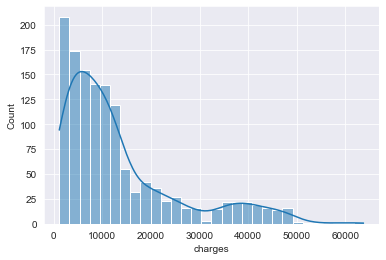

In [55]:
sns.set_style('darkgrid')
sns.histplot(data=df['charges'],kde=True)
# sns.histplot(data=df['charges'],kde=True,cumulative=True)

Note : The data is right skewed.

<AxesSubplot:>

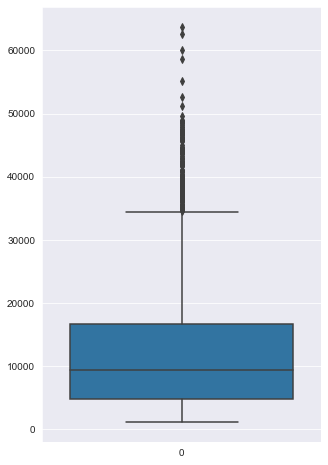

In [56]:
plt.figure(figsize=(5,8))
sns.boxplot(data=df['charges'])

Note : Outliers are present.

### Outlier imputation with IQR

In [86]:
#Finding out the lower and upper range

quartile1 = np.quantile(df['charges'],0.25)
quartile3 = np.quantile(df['charges'],0.75)
iqr = quartile3 - quartile1

lowerRange = quartile1 - quartile1*1.5
upperRange = quartile3 + quartile3*1.5

In [87]:
#Replacing outliers with ranges respectively
df["charges"] = np.where(df["charges"] > upperRange, upperRange,df['charges'])
df['charges'] = np.where(df['charges'] < lowerRange,lowerRange,df['charges'])

## Multivariate Analysis

<AxesSubplot:xlabel='bmi', ylabel='Count'>

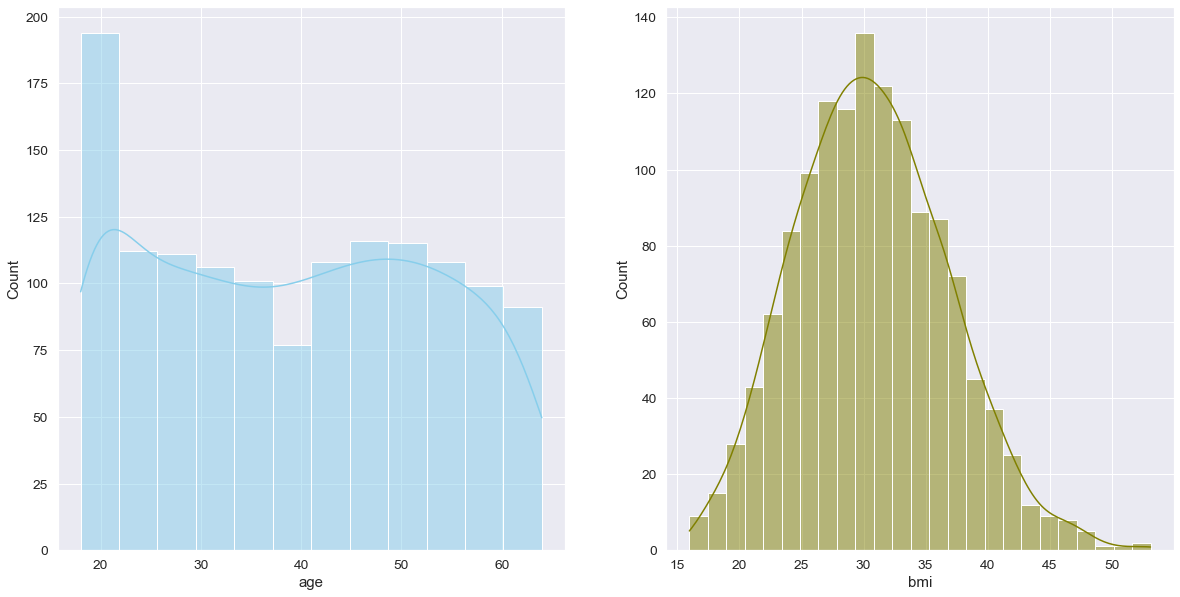

In [138]:
#Plotting Histograms for Continuous Variables 

# df.hist(figsize=(10,10))

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=df, x="age", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="bmi", kde=True, color="olive", ax=axs[1])
# sns.histplot(data=df, x="children", kde=True, color="gold", ax=axs[1, 0])

# df = df.drop(['sex', 'smoker','region'], axis=1)

# col = 0
# for i in range(0,2):
#     col+=1
#     for j in range(0,2):
#         sns.histplot(data=df.loc[col],kde=True, color="teal", ax=axs[i, j],legend=True)

<AxesSubplot:xlabel='children', ylabel='count'>

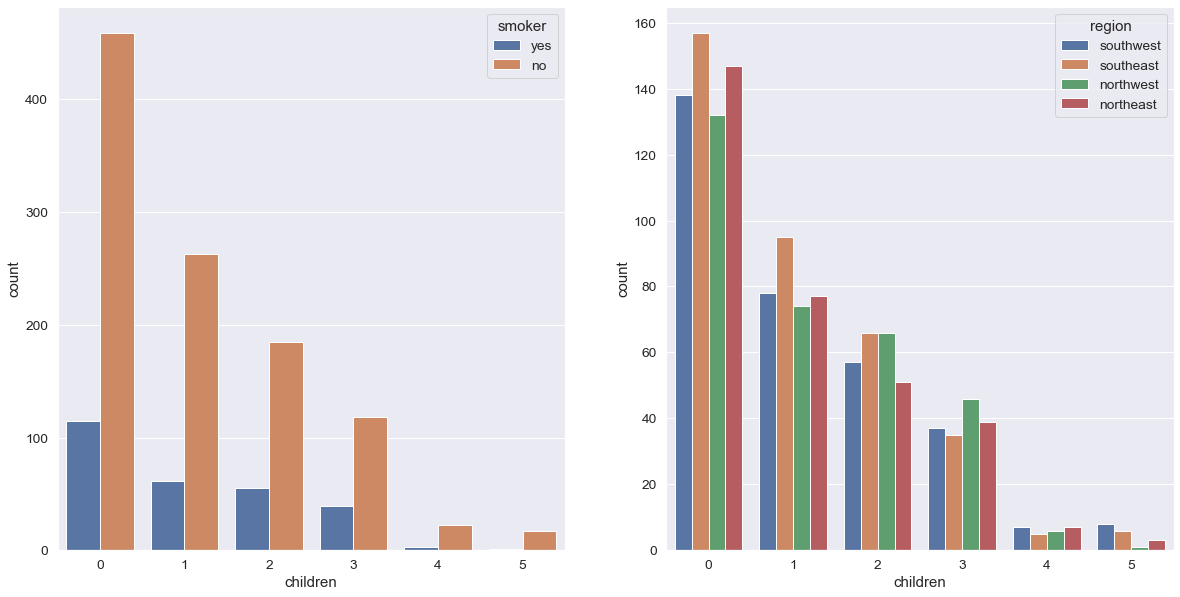

In [128]:
# Countplotfor discrete variable
sns.set(font_scale=1.25)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(data=df,x='children',hue='smoker',ax=axs[0])
sns.countplot(data=df,x='children',hue='region',ax=axs[1])

Note : Most of the subjects have no children

<AxesSubplot:xlabel='bmi'>

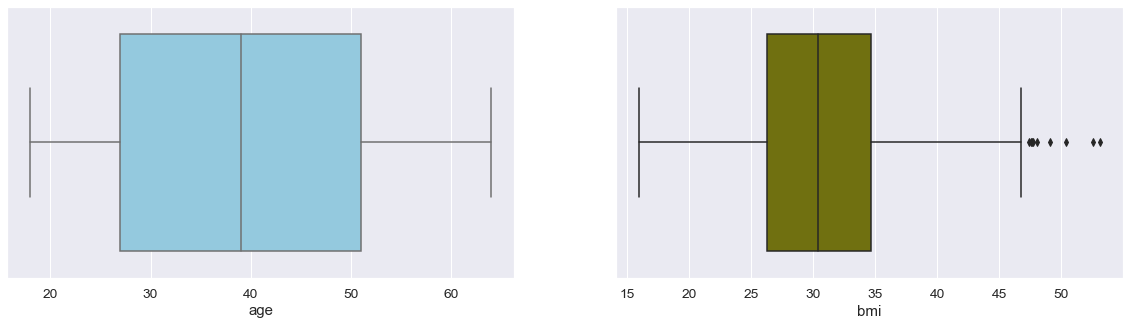

In [141]:
# Boxplots to Check outliers

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=df,x="age", ax=axs[0],color="skyblue")
sns.boxplot(data=df,x="bmi", ax=axs[1],color="olive")


# Encoding for Categorical Variables 

Note: We can impute outliers for 'bmi' and make 'charges' feature normalize by using logarithms. But we will do this on a latter stage.

# Fitting the Model 

### Preparing the Training and Test sets

In [ ]:
X = df.drop